# Feature seletion

## 1. Variance Threshold 
## 2. Recursive feature elimination
## 3. mRMR(Minimum Redundancy Maximum Relevance)

## Data 불러오기
아래 총 4가지의 파일을 불러오고, 3가지 방법으로 feature를 선택한다.

1. total_car.csv
2. total_boo.csv
3. gs_boo.csv
4. hyundai_car.csv

In [2]:
import pandas as pd
import numpy as np

total_car_df = pd.read_csv('total_car.csv',na_values=['#VALUE!', '#DIV/0!'],encoding='CP949')
total_boo_df = pd.read_csv('total_boo.csv',na_values=['#VALUE!', '#DIV/0!'],encoding='CP949')
gs_boo_df = pd.read_csv('gs_boo.csv',na_values=['#VALUE!', '#DIV/0!'],encoding='CP949')
hyundai_car_df = pd.read_csv('hyundai_car.csv',na_values=['#VALUE!', '#DIV/0!'],encoding='CP949')

In [3]:
total_car_df.head()

,회사명,거래소코드,회계년도,자산총계(요약),부채총계(요약),자본총계(요약),매출액,매출원가,매출총이익,판매비와 관리비,...,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률,영업이익_차기
0,(주)광림,14200,18-Dec,236379.0,115448.0,120931.0,75493.0,62506.0,12987.0,10784.0,...,-0.246612,-0.482043,0.029182,-0.772178,1.447338,0.511598,4.652910,0.164565,2.286357,3819
1,(주)광진윈텍,90150,18-Dec,92746.0,61096.0,31651.0,88538.0,77205.0,11332.0,13639.0,...,-0.018707,-0.054817,-0.026045,-0.019596,1.107118,0.341262,12.651688,0.426007,1.895262,2352
2,(주)구영테크,53270,18-Dec,146492.0,88631.0,57861.0,81929.0,69674.0,12255.0,10617.0,...,0.026705,0.067610,0.020005,0.047749,0.992777,0.394977,6.715996,0.437020,1.770752,2514
3,(주)금호에이치티,214330,18-Dec,230269.0,99204.0,131065.0,189250.0,174072.0,15179.0,7665.0,...,0.030847,0.054194,0.039704,0.037532,1.917784,0.569182,12.531961,0.293090,2.633573,4530
4,(주)네오오토,212560,18-Dec,142508.0,64968.0,77540.0,115244.0,105266.0,9978.0,7555.0,...,0.040685,0.074774,0.021016,0.050311,0.984858,0.544110,16.501905,0.261951,3.342757,795


In [4]:
total_boo_df.head()

,회사명,거래소코드,회계년도,자산총계(요약),부채총계(요약),자본총계(요약),매출액,매출원가,매출총이익,판매비와 관리비,...,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률,영업이익_차기
0,(주)까뮤이앤씨,13700,18-Dec,142240.0,82677.0,59563.0,116297.0,104504.0,11793.0,7742.0,...,0.012226,0.029196,0.034825,0.014953,0.686924,0.418750,3.662208,0.204218,2.318219,14845
1,(주)대우건설,47040,18-Dec,8137774.0,5936051.0,2201723.0,10204675.0,9256297.0,948378.0,378888.0,...,0.030430,0.112471,0.055807,0.024266,1.020969,0.270556,2.856462,0.396149,1.008125,156153
2,(주)대원,7680,18-Dec,413728.0,145041.0,268687.0,319582.0,275216.0,44366.0,15076.0,...,0.079054,0.121729,0.091651,0.102343,3.308835,0.649429,26.251765,0.481262,1.884255,10705
3,(주)동원개발,13120,18-Dec,877700.0,174436.0,703264.0,607891.0,435202.0,172689.0,12615.0,...,0.138934,0.173394,0.263327,0.200598,5.407093,0.801258,3.841864,0.707245,0.375212,106109
4,(주)삼일기업공사,2290,18-Dec,61777.0,5005.0,56772.0,56185.0,50242.0,5943.0,2901.0,...,0.050083,0.054499,0.054143,0.055068,12.471934,0.918983,0.807258,0.085994,1.277243,3634


In [5]:
gs_boo_df.head()

,회사명,거래소코드,회계년도,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률
0,지에스건설(주),6360,Dec-81,128425,113446,14980,105579,96756,8823,6248,...,35273,0.019031,0.163151,0.024399,0.023149,0.893537,0.116643,18.597705,0.260653,2.306329
1,지에스건설(주),6360,Dec-82,151771,128452,23318,152111,137236,14875,7754,...,41312,0.025156,0.163736,0.046808,0.025100,1.132901,0.153640,10.528852,0.749201,0.957382
2,지에스건설(주),6360,Dec-83,166438,139283,27154,240839,220506,20333,9298,...,37230,0.028527,0.174855,0.045819,0.019714,1.076706,0.163149,11.416639,0.517862,1.182656
3,지에스건설(주),6360,Dec-84,182495,153671,28824,277801,254708,23093,11695,...,42375,0.017179,0.108764,0.041029,0.011285,1.138456,0.157944,12.595984,0.721935,0.990255
4,지에스건설(주),6360,Dec-85,206772,176681,30091,266215,245456,20759,10952,...,49338,0.007675,0.052740,0.036839,0.005961,1.130991,0.145527,14.482049,0.759678,0.993096


In [6]:
hyundai_car_df.head()

,회사명,거래소코드,회계년도,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률
0,현대모비스(주),12330,Dec-85,315120,265088,50032,344922,324375,20548,18304,...,122761,0.005306,0.033419,0.006506,0.004847,1.329925,0.158771,6.441523,0.981167,0.759650
1,현대모비스(주),12330,Dec-86,325188,272348,52840,526262,490241,36021,25438,...,146857,0.007540,0.046404,0.020110,0.004659,0.904022,0.162491,6.617938,0.511273,1.263427
2,현대모비스(주),12330,Dec-87,401620,346239,55381,591277,552270,39006,26029,...,178408,0.006282,0.045557,0.021947,0.004267,0.888841,0.137894,8.413457,0.533121,1.309263
3,현대모비스(주),12330,Dec-88,416814,360890,55925,567256,525742,41514,24169,...,189918,0.016957,0.126384,0.030577,0.012460,0.803823,0.134172,8.712536,0.401626,1.617301
4,현대모비스(주),12330,Dec-89,670100,486974,183125,676821,601351,75470,31368,...,354028,0.021324,0.078029,0.065159,0.021112,0.777445,0.273281,6.931671,0.222203,2.381365


## Statistical approaches : Variance Threshold method
가장 명확한 제거 후보군은 피처의 값이 변하지 않는 것입니다. 이는 정보가 전혀 없습니다.
이런 생각에 기초해서 낮은 분산을 가진 피처가 높은 분산을 가진 것보다 더 나쁘다고 할 수 있다. 그래서, 특정 threshold 아래 분산을 가진 피처를 자르는 것을 고려할 수 있습니다.

In [7]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


gs_boo = gs_boo_df.iloc[:, 3:]
gs_boo.head()

hyundai_car = hyundai_car_df.iloc[:, 3:]
total_boo = total_boo_df.iloc[:, 3:]
total_car = total_car_df.iloc[:, 3:]

In [8]:
y_target = gs_boo['영업이익']
X_data = gs_boo.drop(['영업이익'], axis=1, inplace=False)

y_target1 = hyundai_car['영업이익']
X_data1 = hyundai_car.drop(['영업이익'], axis=1, inplace=False)

y_target2 = total_boo['영업이익_차기']
X_data2 = total_boo.drop(['영업이익_차기'], axis=1, inplace=False)

y_target3 = total_car['영업이익_차기']
X_data3 = total_car.drop(['영업이익_차기'], axis=1, inplace=False)

print(X_data.shape)
print(X_data1.shape)
print(X_data2.shape)
print(X_data3.shape)

(39, 22)
(35, 22)
(1024, 23)
(2159, 23)


In [9]:
print(VarianceThreshold(.7).fit_transform(X_data).shape)
print(VarianceThreshold(.7).fit_transform(X_data1).shape)
print(VarianceThreshold(.7).fit_transform(X_data2).shape)
print(VarianceThreshold(.7).fit_transform(X_data3).shape)

(39, 14)
(35, 15)
(1024, 19)
(2159, 18)


In [10]:
VarianceThreshold(.7).fit(X_data).get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False])

In [11]:
X_selected = X_data.loc[:, VarianceThreshold(.7).fit(X_data).get_support()]
X_selected.head()

,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,당기순이익,유동자산,유동부채,비유동부채,자본금,비유동자산,부채비용
0,128425,113446,14980,105579,96756,8823,6248,2444,93153,104252,9194,6100,35273,18.597705
1,151771,128452,23318,152111,137236,14875,7754,3818,110459,97501,30951,12200,41312,10.528852
2,166438,139283,27154,240839,220506,20333,9298,4748,129208,120003,19280,12200,37230,11.416639
3,182495,153671,28824,277801,254708,23093,11695,3135,140120,123079,30592,12200,42375,12.595984
4,206772,176681,30091,266215,245456,20759,10952,1587,157434,139200,37481,12200,49338,14.482049


In [12]:
X_data.columns

Index(['자산총계', '부채총계', '자본총계', '매출액', '매출원가', '매출총이익', '판매비와 관리비', '당기순이익',
       '유동자산', '유동부채', '비유동부채', '자본금', '비유동자산', '총자산수익률(ROA)', '자기자본수익률(ROE)',
       '영업이익률', '당기순이익률', '유동비율', '자기자본비율', '부채비용', '비유동비율', '비유동장기적합률'],
      dtype='object')

In [13]:
X_selected.columns

Index(['자산총계', '부채총계', '자본총계', '매출액', '매출원가', '매출총이익', '판매비와 관리비', '당기순이익',
       '유동자산', '유동부채', '비유동부채', '자본금', '비유동자산', '부채비용'],
      dtype='object')

Variance threshold가 0.7로 설정했다면,이렇게 총 22개 칼럼 중 14개 칼럼을 선정할 수 있다.
문제는 선정된 점을 확인해보면, 그 값의 단위가 매우 달라 분산 차이가 클 것이라 기대할 수 있어서, 표준화가 선행되어야 한다.

In [14]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체
scaler = StandardScaler()

# fit and transform()
scaler.fit(X_data)
X_scaled = scaler.transform(X_data)

scaler.fit(X_data1)
X_scaled1 = scaler.transform(X_data1)

scaler.fit(X_data2)
X_scaled2 = scaler.transform(X_data2)

scaler.fit(X_data3)
X_scaled3 = scaler.transform(X_data3)

In [15]:
X_scaled_df = pd.DataFrame(X_scaled, index=X_data.index, columns=X_data.columns)
X_scaled_df1 = pd.DataFrame(X_scaled1, index=X_data1.index, columns=X_data1.columns)
X_scaled_df2 = pd.DataFrame(X_scaled2, index=X_data2.index, columns=X_data2.columns)
X_scaled_df3 = pd.DataFrame(X_scaled3, index=X_data3.index, columns=X_data3.columns)

In [16]:
X_scaled_df.head()

,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,당기순이익,유동자산,유동부채,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률
0,-0.981331,-0.976101,-0.958666,-1.070099,-1.050508,-0.928931,-1.086774,-0.396572,-0.959730,-0.953368,...,-0.979527,-0.247008,0.794902,-0.821783,-0.042540,-2.360593,-1.553344,0.439240,-1.182522,1.641143
1,-0.976043,-0.971084,-0.953008,-1.057356,-1.038431,-0.914394,-1.078869,-0.390794,-0.953888,-0.956372,...,-0.975555,-0.034469,0.801555,-0.231154,0.020570,-0.924405,-1.167837,-0.767145,0.132473,-0.728093
2,-0.972720,-0.967463,-0.950404,-1.033059,-1.013587,-0.901285,-1.070765,-0.386883,-0.947558,-0.946358,...,-0.978240,0.082484,0.927940,-0.257219,-0.153594,-1.261574,-1.068760,-0.634411,-0.490208,-0.332432
3,-0.969083,-0.962653,-0.949271,-1.022937,-1.003382,-0.894655,-1.058183,-0.393666,-0.943874,-0.944989,...,-0.974856,-0.311265,0.176669,-0.383457,-0.426185,-0.891077,-1.122993,-0.458086,0.059082,-0.670357
4,-0.963584,-0.954960,-0.948411,-1.026110,-1.006143,-0.900261,-1.062083,-0.400176,-0.938029,-0.937815,...,-0.970276,-0.640996,-0.460162,-0.493911,-0.598345,-0.935864,-1.252372,-0.176098,0.160673,-0.665367


In [17]:
print(np.var(X_scaled))
print(np.var(X_scaled1))
print(np.var(X_scaled2))
print(np.var(X_scaled3))

1.0
1.0
nan
nan


다시한번 Variance Threshold 0.7을 적용한다.

In [18]:
VarianceThreshold(.7).fit_transform(X_scaled_df).shape

(39, 22)

문제는 버려진 피처가 하나도 없다. 분산을 1로 올려본다.

In [19]:
print(VarianceThreshold(1.0).fit_transform(X_scaled_df).shape)
print(VarianceThreshold(1.0).fit_transform(X_scaled_df1).shape)
print(VarianceThreshold(1.0).fit_transform(X_scaled_df2).shape)
print(VarianceThreshold(1.0).fit_transform(X_scaled_df3).shape)

(39, 8)
(35, 5)
(1024, 5)
(2159, 4)


In [20]:
X_selected_scaled = X_data.iloc[:, VarianceThreshold(1.0).fit(X_scaled_df).get_support()] 
X_selected_scaled1 = X_data1.iloc[:, VarianceThreshold(1.0).fit(X_scaled_df1).get_support()] 
X_selected_scaled2 = X_data2.iloc[:, VarianceThreshold(1.0).fit(X_scaled_df2).get_support()] 
X_selected_scaled3 = X_data3.iloc[:, VarianceThreshold(1.0).fit(X_scaled_df3).get_support()]

In [21]:
print(X_selected_scaled.columns)
print(X_selected_scaled1.columns)
print(X_selected_scaled2.columns)
print(X_selected_scaled3.columns)

Index(['자산총계', '부채총계', '매출액', '매출총이익', '자기자본수익률(ROE)', '영업이익률', '당기순이익률',
       '비유동장기적합률'],
      dtype='object')
Index(['매출액', '당기순이익', '비유동자산', '유동비율', '자기자본비율'], dtype='object')
Index(['부채총계(요약)', '영업이익', '당기순이익(요약)', '유동부채(요약)', '총자산수익률(ROA)'], dtype='object')
Index(['자산총계(요약)', '매출액', '자기자본수익률(ROE)', '영업이익률'], dtype='object')


In [22]:
X_selected_scaled.head()

,자산총계,부채총계,매출액,매출총이익,자기자본수익률(ROE),영업이익률,당기순이익률,비유동장기적합률
0,128425,113446,105579,8823,0.163151,0.024399,0.023149,2.306329
1,151771,128452,152111,14875,0.163736,0.046808,0.025100,0.957382
2,166438,139283,240839,20333,0.174855,0.045819,0.019714,1.182656
3,182495,153671,277801,23093,0.108764,0.041029,0.011285,0.990255
4,206772,176681,266215,20759,0.052740,0.036839,0.005961,0.993096


In [23]:
X_selected_scaled1.head()

,매출액,당기순이익,비유동자산,유동비율,자기자본비율
0,344922,1672,122761,1.329925,0.158771
1,526262,2452,146857,0.904022,0.162491
2,591277,2523,178408,0.888841,0.137894
3,567256,7068,189918,0.803823,0.134172
4,676821,14289,354028,0.777445,0.273281


In [24]:
X_selected_scaled2.head()

,부채총계(요약),영업이익,당기순이익(요약),유동부채(요약),총자산수익률(ROA)
0,82677.0,4050.0,1739.0,62381.0,0.012226
1,5936051.0,569490.0,247631.0,4554288.0,0.030430
2,145041.0,29290.0,32707.0,91272.0,0.079054
3,174436.0,160074.0,121942.0,158035.0,0.138934
4,5005.0,3042.0,3094.0,4240.0,0.050083


In [25]:
X_selected_scaled3.head()

,자산총계(요약),매출액,자기자본수익률(ROE),영업이익률
0,236379.0,75493.0,-0.482043,0.029182
1,92746.0,88538.0,-0.054817,-0.026045
2,146492.0,81929.0,0.067610,0.020005
3,230269.0,189250.0,0.054194,0.039704
4,142508.0,115244.0,0.074774,0.021016


In [152]:
X_selected_vt = X_selected_scaled
X_selected_vt1 = X_selected_scaled1
X_selected_vt2 = X_selected_scaled2
X_selected_vt3 = X_selected_scaled3

In [153]:
X_selected_vt.head()

,자산총계,부채총계,매출액,매출총이익,자기자본수익률(ROE),영업이익률,당기순이익률,비유동장기적합률
0,128425,113446,105579,8823,0.163151,0.024399,0.023149,2.306329
1,151771,128452,152111,14875,0.163736,0.046808,0.025100,0.957382
2,166438,139283,240839,20333,0.174855,0.045819,0.019714,1.182656
3,182495,153671,277801,23093,0.108764,0.041029,0.011285,0.990255
4,206772,176681,266215,20759,0.052740,0.036839,0.005961,0.993096


In [154]:
X_selected_vt = pd.concat([gs_boo_df.iloc[:, :3], X_selected_vt], axis = 1)
X_selected_vt1 = pd.concat([hyundai_car_df.iloc[:, :3], X_selected_vt1], axis = 1)
X_selected_vt2 = pd.concat([total_boo_df.iloc[:, :3], X_selected_vt2], axis = 1)
X_selected_vt3 = pd.concat([total_car_df.iloc[:, :3], X_selected_vt3], axis = 1)

In [155]:
X_selected_vt.head()

,회사명,거래소코드,회계년도,자산총계,부채총계,매출액,매출총이익,자기자본수익률(ROE),영업이익률,당기순이익률,비유동장기적합률
0,지에스건설(주),6360,Dec-81,128425,113446,105579,8823,0.163151,0.024399,0.023149,2.306329
1,지에스건설(주),6360,Dec-82,151771,128452,152111,14875,0.163736,0.046808,0.025100,0.957382
2,지에스건설(주),6360,Dec-83,166438,139283,240839,20333,0.174855,0.045819,0.019714,1.182656
3,지에스건설(주),6360,Dec-84,182495,153671,277801,23093,0.108764,0.041029,0.011285,0.990255
4,지에스건설(주),6360,Dec-85,206772,176681,266215,20759,0.052740,0.036839,0.005961,0.993096


In [156]:
X_selected_vt1.head()

,회사명,거래소코드,회계년도,매출액,당기순이익,비유동자산,유동비율,자기자본비율
0,현대모비스(주),12330,Dec-85,344922,1672,122761,1.329925,0.158771
1,현대모비스(주),12330,Dec-86,526262,2452,146857,0.904022,0.162491
2,현대모비스(주),12330,Dec-87,591277,2523,178408,0.888841,0.137894
3,현대모비스(주),12330,Dec-88,567256,7068,189918,0.803823,0.134172
4,현대모비스(주),12330,Dec-89,676821,14289,354028,0.777445,0.273281


In [157]:
X_selected_vt2.head()

,회사명,거래소코드,회계년도,부채총계(요약),영업이익,당기순이익(요약),유동부채(요약),총자산수익률(ROA)
0,(주)까뮤이앤씨,13700,18-Dec,82677.0,4050.0,1739.0,62381.0,0.012226
1,(주)대우건설,47040,18-Dec,5936051.0,569490.0,247631.0,4554288.0,0.030430
2,(주)대원,7680,18-Dec,145041.0,29290.0,32707.0,91272.0,0.079054
3,(주)동원개발,13120,18-Dec,174436.0,160074.0,121942.0,158035.0,0.138934
4,(주)삼일기업공사,2290,18-Dec,5005.0,3042.0,3094.0,4240.0,0.050083


In [161]:
X_selected_vt3.head()

,회사명,거래소코드,회계년도,자산총계(요약),매출액,자기자본수익률(ROE),영업이익률,영업이익_차기
0,(주)광림,14200,18-Dec,236379.0,75493.0,-0.482043,0.029182,3819
1,(주)광진윈텍,90150,18-Dec,92746.0,88538.0,-0.054817,-0.026045,2352
2,(주)구영테크,53270,18-Dec,146492.0,81929.0,0.067610,0.020005,2514
3,(주)금호에이치티,214330,18-Dec,230269.0,189250.0,0.054194,0.039704,4530
4,(주)네오오토,212560,18-Dec,142508.0,115244.0,0.074774,0.021016,795


In [159]:
X_selected_vt['영업이익'] = y_target
X_selected_vt1['영업이익'] = y_target1
X_selected_vt2['영업이익_차기'] = y_target2
X_selected_vt3['영업이익_차기'] = y_target3

In [160]:
X_selected_vt.to_csv('gs_boo_vt.csv', encoding='CP949')
X_selected_vt1.to_csv('hyundai_car_vt.csv', encoding='CP949')
X_selected_vt2.to_csv('total_boo_vt.csv', encoding='CP949')
X_selected_vt3.to_csv('total_car_vt.csv', encoding='CP949')

이렇게 9개가 선택이 되었다. 다음은 MinMaxScaler로 선택해본다.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# StandardScaler 객체
mscaler = MinMaxScaler()

# fit and transform()
mscaler.fit(X_data)

X_scaled_m = mscaler.transform(X_data)
X_scaled_m_df = pd.DataFrame(X_scaled_m, index=X_data.index, columns=X_data.columns)

In [35]:
np.var(X_scaled_m)

0.10516125135681663

In [36]:
X_scaled_m_df.head()

,자산총계,부채총계,자본총계,매출액,매출원가,매출총이익,판매비와 관리비,당기순이익,유동자산,유동부채,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,비유동장기적합률
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.285441,0.000000,0.609024,0.000000,0.000880,...,0.000000,0.626017,0.898084,0.661585,0.761241,0.000000,0.000000,0.507785,0.005727,1.000000
1,0.001855,0.001624,0.002011,0.003984,0.003971,0.288349,0.002565,0.609925,0.001999,0.000000,...,0.001110,0.662725,0.899195,0.756872,0.771782,0.321782,0.118244,0.182061,0.310704,0.294858
2,0.003021,0.002796,0.002936,0.011580,0.012140,0.290972,0.005194,0.610535,0.004164,0.002933,...,0.000360,0.682925,0.920299,0.752667,0.742692,0.246238,0.148633,0.217899,0.166290,0.412616
3,0.004297,0.004352,0.003339,0.014744,0.015495,0.292299,0.009276,0.609477,0.005424,0.003334,...,0.001305,0.614919,0.794853,0.732301,0.697163,0.329249,0.131999,0.265507,0.293683,0.312042
4,0.006226,0.006842,0.003644,0.013753,0.014588,0.291177,0.008010,0.608462,0.007423,0.005435,...,0.002585,0.557970,0.688516,0.714481,0.668408,0.319214,0.092315,0.341644,0.317244,0.313527


In [37]:
VarianceThreshold(.1).fit_transform(X_scaled_m_df).shape

(39, 7)

In [38]:
X_selected_m_scaled = X_data.iloc[:, VarianceThreshold(.1).fit(X_scaled_m_df).get_support()] 

In [39]:
X_selected_m_scaled.columns

Index(['자산총계', '부채총계', '자본총계', '매출원가', '판매비와 관리비', '유동자산', '자본금'], dtype='object')

In [40]:
X_selected_m_scaled.head()

,자산총계,부채총계,자본총계,매출원가,판매비와 관리비,유동자산,자본금
0,128425,113446,14980,96756,6248,93153,6100
1,151771,128452,23318,137236,7754,110459,12200
2,166438,139283,27154,220506,9298,129208,12200
3,182495,153671,28824,254708,11695,140120,12200
4,206772,176681,30091,245456,10952,157434,12200


## 2. Recursive Feature Elimination

feature 개수를 14개로 임의로 선정 후 간단히 그 성능을 확인했다.

In [41]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=14)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_data, y_target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



MAE: -108504.175 (119329.800)


In [42]:
n_scores1 = cross_val_score(pipeline, X_data1, y_target1, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')



print('MAE: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

MAE: -131189.983 (75704.108)


In [46]:
n_scores2 = cross_val_score(pipeline, X_data2.fillna(0), y_target2, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')


print('MAE: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

MAE: -35973.264 (7854.626)


In [47]:
n_scores3 = cross_val_score(pipeline, X_data3.fillna(0), y_target3, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

MAE: -25265.011 (8601.570)


## feature 개수 선정

In [55]:
# The number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 22):
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
results1, names1 = list(), list()
results2, names2 = list(), list()
results3, names3 = list(), list()

In [56]:
for name, model in models.items():
    scores = evaluate_model(model, X_data, y_target)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>2 -86294.264 (93866.646)
>3 -89457.389 (96166.665)
>4 -94716.894 (105339.687)
>5 -94620.889 (99065.076)
>6 -111567.592 (107849.543)
>7 -94313.886 (99145.393)
>8 -100925.158 (112485.410)
>9 -88511.497 (96361.735)
>10 -117595.578 (117303.166)
>11 -92967.342 (95928.472)
>12 -88234.714 (102947.172)
>13 -91761.944 (97391.493)
>14 -95231.167 (104686.676)
>15 -96407.567 (103182.018)
>16 -106726.906 (106988.035)
>17 -103297.733 (102807.035)
>18 -101530.008 (112158.232)
>19 -95414.381 (100365.235)
>20 -101238.803 (111500.542)
>21 -90540.833 (98433.662)


In [57]:
for name, model in models.items():
    scores = evaluate_model(model, X_data1, y_target1)
    results1.append(scores)
    names1.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>2 -132178.447 (71312.140)
>3 -121289.114 (77420.172)
>4 -127378.078 (68413.592)
>5 -117516.072 (70981.706)
>6 -124864.442 (73441.795)
>7 -115149.225 (72041.586)
>8 -122015.714 (71909.347)
>9 -122150.911 (57738.322)
>10 -110984.692 (70876.789)
>11 -119963.211 (72507.983)
>12 -116447.536 (74610.534)
>13 -122935.597 (77830.291)
>14 -128347.758 (80499.922)
>15 -120124.319 (65380.360)
>16 -118140.967 (69827.225)
>17 -130634.044 (76070.707)
>18 -117170.681 (62290.551)
>19 -118035.147 (60231.139)
>20 -122878.392 (67162.339)
>21 -110615.694 (63402.150)


In [58]:
for name, model in models.items():
    scores = evaluate_model(model, X_data2.fillna(0), y_target2)
    results2.append(scores)
    names2.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>2 -38175.015 (8971.060)
>3 -38486.796 (10528.763)
>4 -38380.419 (8443.659)
>5 -38088.587 (8143.941)
>6 -37423.818 (9055.784)
>7 -36679.856 (7763.858)
>8 -36580.209 (7535.080)
>9 -37595.289 (8462.580)
>10 -36686.185 (8589.540)
>11 -37115.892 (8495.456)
>12 -36973.944 (8388.257)
>13 -37250.075 (8289.104)
>14 -36043.501 (8243.177)
>15 -36776.295 (8477.043)
>16 -36867.703 (8306.823)
>17 -36507.359 (8406.578)
>18 -36166.785 (8294.479)
>19 -36487.695 (8644.874)
>20 -36702.228 (8480.439)
>21 -37025.422 (7648.487)


In [59]:
for name, model in models.items():
    scores = evaluate_model(model, X_data3.fillna(0), y_target3)
    results3.append(scores)
    names3.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>2 -25916.689 (6321.292)
>3 -25953.444 (8907.981)
>4 -24251.598 (7664.925)
>5 -24552.727 (7375.671)
>6 -24086.869 (8738.021)
>7 -25911.495 (8054.698)
>8 -24415.251 (7712.675)
>9 -26049.108 (10688.825)
>10 -25630.295 (8326.630)
>11 -26521.398 (10287.692)
>12 -25853.578 (9270.396)
>13 -26311.642 (10417.267)
>14 -25078.678 (10344.930)
>15 -23903.982 (7068.444)
>16 -24771.857 (8236.798)
>17 -24553.191 (7956.436)
>18 -25024.761 (7600.147)
>19 -24566.940 (7733.699)
>20 -24992.689 (9543.903)
>21 -24596.755 (9719.952)


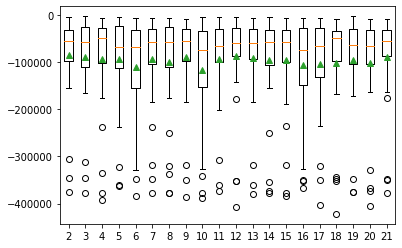

In [60]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [116]:
results_mean = []
results_mean1 = []
results_mean2 = []
results_mean3 = []

for i in range(0, len(results)):
    results_mean.append(mean(results[i]))
    results_mean1.append(mean(results1[i]))
    results_mean2.append(mean(results2[i]))
    results_mean3.append(mean(results3[i]))

In [129]:
print(np.min(results_mean[8:])) # >10 -117595.578 (117303.166)
print(np.min(results_mean1[8:])) # >17 -130634.044 (76070.707)
print(np.min(results_mean2[8:])) # >13 -37250.075 (8289.104)
print(np.min(results_mean3[8:])) # >11 -26521.398 (10287.692)

-106726.90555555557
-130634.04444444443
-37250.075371216444
-26521.39762662513


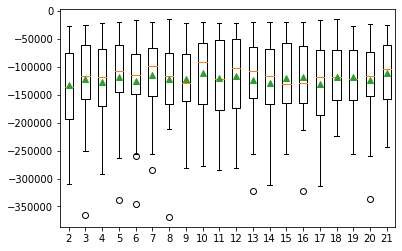

In [61]:
# plot model performance for comparison
pyplot.boxplot(results1, labels=names1, showmeans=True)
pyplot.show()

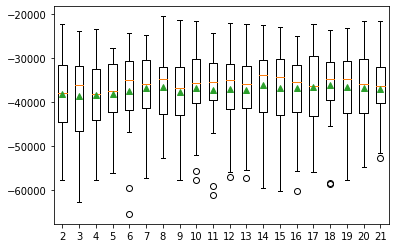

In [62]:
# plot model performance for comparison
pyplot.boxplot(results2, labels=names2, showmeans=True)
pyplot.show()

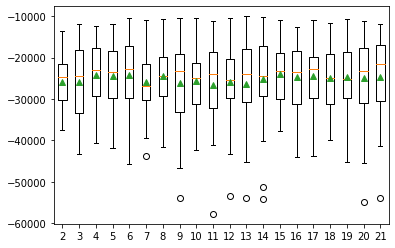

In [63]:
# plot model performance for comparison
pyplot.boxplot(results3, labels=names3, showmeans=True)
pyplot.show()

위의 그래프를 통해, 가장낮은 mae를 가지는 개수로 변수 개수를 제한한다.

    print(np.min(results_mean[8:])) # >10 -117595.578 (117303.166)
    print(np.min(results_mean1[8:])) # >17 -130634.044 (76070.707)
    print(np.min(results_mean2[8:])) # >13 -37250.075 (8289.104)
    print(np.min(results_mean3[8:])) # >11 -26521.398 (10287.692)

In [130]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
# fit RFE
rfe.fit(X_data, y_target)
# summarize all features
for i in range(X_data.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 13.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 10.000
Column: 6, Selected False, Rank: 9.000
Column: 7, Selected False, Rank: 7.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected False, Rank: 11.000
Column: 11, Selected False, Rank: 12.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 8.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 4.000
Column: 16, Selected False, Rank: 5.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000


In [131]:
# define RFE
rfe1 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=17)
# fit RFE
rfe1.fit(X_data1, y_target1)
# summarize all features
for i in range(X_data1.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe1.support_[i], rfe1.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 2.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 5.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected False, Rank: 4.000


In [133]:
# define RFE
rfe2 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=13)
# fit RFE
rfe2.fit(X_data2.fillna(0), y_target2)
# summarize all features
for i in range(X_data2.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe2.support_[i], rfe2.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 11.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 8.000
Column: 10, Selected False, Rank: 4.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 10.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 7.000
Column: 18, Selected False, Rank: 2.000
Column: 19, Selected False, Rank: 6.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 9.000


In [134]:
# define RFE
rfe3 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=11)
# fit RFE
rfe3.fit(X_data3.fillna(0), y_target3)
# summarize all features
for i in range(X_data3.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe3.support_[i], rfe3.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 7.000
Column: 2, Selected False, Rank: 8.000
Column: 3, Selected False, Rank: 13.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 10.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 9.000
Column: 11, Selected False, Rank: 4.000
Column: 12, Selected False, Rank: 12.000
Column: 13, Selected False, Rank: 3.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected False, Rank: 2.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 11.000
Column: 19, Selected False, Rank: 6.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000


In [136]:
X_selected_rfe = X_data.iloc[:, rfe.fit(X_data, y_target).get_support()]
X_selected_rfe1 = X_data1.iloc[:, rfe1.fit(X_data1, y_target1).get_support()]
X_selected_rfe2 = X_data2.iloc[:, rfe2.fit(X_data2.fillna(0), y_target2).get_support()]
X_selected_rfe3 = X_data3.iloc[:, rfe3.fit(X_data3.fillna(0), y_target3).get_support()]

In [163]:
X_selected_rfe.head()

,회사명,거래소코드,회계년도,부채총계,매출원가,당기순이익,유동자산,유동부채,비유동부채,자기자본수익률(ROE),유동비율,부채비용,비유동장기적합률,영업이익
0,지에스건설(주),6360,Dec-81,113446,96756,2444,93153,104252,9194,0.163151,0.893537,18.597705,2.306329,2576
1,지에스건설(주),6360,Dec-82,128452,137236,3818,110459,97501,30951,0.163736,1.132901,10.528852,0.957382,7120
2,지에스건설(주),6360,Dec-83,139283,220506,4748,129208,120003,19280,0.174855,1.076706,11.416639,1.182656,11035
3,지에스건설(주),6360,Dec-84,153671,254708,3135,140120,123079,30592,0.108764,1.138456,12.595984,0.990255,11398
4,지에스건설(주),6360,Dec-85,176681,245456,1587,157434,139200,37481,0.052740,1.130991,14.482049,0.993096,9807


In [164]:
X_selected_rfe1.head()

,회사명,거래소코드,회계년도,자본총계,매출액,매출총이익,판매비와 관리비,당기순이익,유동자산,유동부채,...,비유동자산,총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,자기자본비율,부채비용,비유동비율,영업이익
0,현대모비스(주),12330,Dec-85,50032,344922,20548,18304,1672,192359,144639,...,122761,0.005306,0.033419,0.006506,0.004847,1.329925,0.158771,6.441523,0.981167,2244
1,현대모비스(주),12330,Dec-86,52840,526262,36021,25438,2452,178331,197264,...,146857,0.007540,0.046404,0.020110,0.004659,0.904022,0.162491,6.617938,0.511273,10583
2,현대모비스(주),12330,Dec-87,55381,591277,39006,26029,2523,223211,251126,...,178408,0.006282,0.045557,0.021947,0.004267,0.888841,0.137894,8.413457,0.533121,12977
3,현대모비스(주),12330,Dec-88,55925,567256,41514,24169,7068,226896,282271,...,189918,0.016957,0.126384,0.030577,0.012460,0.803823,0.134172,8.712536,0.401626,17345
4,현대모비스(주),12330,Dec-89,183125,676821,75470,31368,14289,316071,406551,...,354028,0.021324,0.078029,0.065159,0.021112,0.777445,0.273281,6.931671,0.222203,44101


In [165]:
X_selected_rfe2.head()

,회사명,거래소코드,회계년도,자산총계(요약),자본총계(요약),매출원가,매출총이익,영업이익,당기순이익(요약),유동자산,비유동자산(요약),총자산수익률(ROA),자기자본수익률(ROE),당기순이익률,유동비율,비유동장기적합률,영업이익_차기
0,(주)까뮤이앤씨,13700,18-Dec,142240.0,59563.0,104504.0,11793.0,4050.0,1739.0,42851.0,99389.0,0.012226,0.029196,0.014953,0.686924,2.318219,14845
1,(주)대우건설,47040,18-Dec,8137774.0,2201723.0,9256297.0,948378.0,569490.0,247631.0,4649787.0,3487987.0,0.030430,0.112471,0.024266,1.020969,1.008125,156153
2,(주)대원,7680,18-Dec,413728.0,268687.0,275216.0,44366.0,29290.0,32707.0,302004.0,111725.0,0.079054,0.121729,0.102343,3.308835,1.884255,10705
3,(주)동원개발,13120,18-Dec,877700.0,703264.0,435202.0,172689.0,160074.0,121942.0,854510.0,23190.0,0.138934,0.173394,0.200598,5.407093,0.375212,106109
4,(주)삼일기업공사,2290,18-Dec,61777.0,56772.0,50242.0,5943.0,3042.0,3094.0,52881.0,8896.0,0.050083,0.054499,0.055068,12.471934,1.277243,3634


In [166]:
X_selected_rfe3.head()

,회사명,거래소코드,회계년도,부채총계(요약),자본총계(요약),비유동부채(요약),비유동자산(요약),총자산수익률(ROA),자기자본수익률(ROE),영업이익률,당기순이익률,유동비율,부채비용,비유동비율,영업이익_차기
0,(주)광림,14200,18-Dec,115448.0,120931.0,14967.0,90949.0,-0.246612,-0.482043,0.029182,-0.772178,1.447338,4.652910,0.164565,3819
1,(주)광진윈텍,90150,18-Dec,61096.0,31651.0,20243.0,47518.0,-0.018707,-0.054817,-0.026045,-0.019596,1.107118,12.651688,0.426007,2352
2,(주)구영테크,53270,18-Dec,88631.0,57861.0,45159.0,103334.0,0.026705,0.067610,0.020005,0.047749,0.992777,6.715996,0.437020,2514
3,(주)금호에이치티,214330,18-Dec,99204.0,131065.0,26784.0,91385.0,0.030847,0.054194,0.039704,0.037532,1.917784,12.531961,0.293090,4530
4,(주)네오오토,212560,18-Dec,64968.0,77540.0,27721.0,105825.0,0.040685,0.074774,0.021016,0.050311,0.984858,16.501905,0.261951,795


In [167]:
print(X_selected_rfe.shape)
print(X_selected_rfe1.shape)
print(X_selected_rfe2.shape)
print(X_selected_rfe3.shape)

(39, 14)
(35, 21)
(1024, 17)
(2159, 15)


In [144]:
X_selected_rfe['영업이익'] = y_target
X_selected_rfe1['영업이익'] = y_target1
X_selected_rfe2['영업이익_차기'] = y_target2
X_selected_rfe3['영업이익_차기'] = y_target3

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [145]:
print(X_selected_rfe.head())
print(X_selected_rfe1.head())
print(X_selected_rfe2.head())
print(X_selected_rfe3.head())

     부채총계    매출원가  당기순이익    유동자산    유동부채  비유동부채  자기자본수익률(ROE)      유동비율  \
0  113446   96756   2444   93153  104252   9194      0.163151  0.893537   
1  128452  137236   3818  110459   97501  30951      0.163736  1.132901   
2  139283  220506   4748  129208  120003  19280      0.174855  1.076706   
3  153671  254708   3135  140120  123079  30592      0.108764  1.138456   
4  176681  245456   1587  157434  139200  37481      0.052740  1.130991   

        부채비용  비유동장기적합률   영업이익  
0  18.597705  2.306329   2576  
1  10.528852  0.957382   7120  
2  11.416639  1.182656  11035  
3  12.595984  0.990255  11398  
4  14.482049  0.993096   9807  
     자본총계     매출액  매출총이익  판매비와 관리비  당기순이익    유동자산    유동부채   비유동부채   비유동자산  \
0   50032  344922  20548     18304   1672  192359  144639  120449  122761   
1   52840  526262  36021     25438   2452  178331  197264   75084  146857   
2   55381  591277  39006     26029   2523  223211  251126   95113  178408   
3   55925  567256  41514     24169   7068  226896

In [146]:
X_selected_rfe = pd.concat([gs_boo_df.iloc[:, :3], X_selected_rfe], axis = 1)
X_selected_rfe1 = pd.concat([hyundai_car_df.iloc[:, :3], X_selected_rfe1], axis = 1)
X_selected_rfe2 = pd.concat([total_boo_df.iloc[:, :3], X_selected_rfe2], axis = 1)
X_selected_rfe3 = pd.concat([total_car_df.iloc[:, :3], X_selected_rfe3], axis = 1)

In [168]:
X_selected_rfe.to_csv('gs_boo_rfe.csv', encoding='CP949')
X_selected_rfe1.to_csv('hyundai_car_rfe.csv', encoding='CP949')
X_selected_rfe2.to_csv('total_boo_rfe.csv', encoding='CP949')
X_selected_rfe3.to_csv('total_car_rfe.csv', encoding='CP949')

## 3. Sequential Feature Selection.

N -> N+1개씩 피처를 추가하며 테스트 한다.

    print(np.min(results_mean[8:])) # >10 -117595.578 (117303.166)
    print(np.min(results_mean1[8:])) # >17 -130634.044 (76070.707)
    print(np.min(results_mean2[8:])) # >13 -37250.075 (8289.104)
    print(np.min(results_mean3[8:])) # >11 -26521.398 (10287.692)

In [169]:
# Install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor


selector = SFS(RandomForestRegressor(), scoring='r2', 
                                     verbose=2, k_features=10, forward=False, n_jobs=-1)

selector.fit(X_data, y_target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    6.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    6.1s finished

[2021-01-22 23:58:54] Features: 21/10 -- score: -21.597622159498233[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    4.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.2s finished

[2021-01-22 23:58:58] Features: 20/10 -- score: -17.220858055840885[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.1s finished

[2021-01-22 23:59:02] Features: 19/10 -- score: -15.397256322916068[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out 

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=10, n_jobs=-1, scoring='r2', verbose=2)

In [170]:
selector1 = SFS(RandomForestRegressor(), scoring='r2', 
                                     verbose=2, k_features=17, forward=False, n_jobs=-1)

selector1.fit(X_data1, y_target1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    3.8s finished

[2021-01-23 00:00:05] Features: 21/17 -- score: -0.6803927602032711[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    3.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.0s finished

[2021-01-23 00:00:09] Features: 20/17 -- score: -0.5344023873646577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.0s finished

[2021-01-23 00:00:13] Features: 19/17 -- score: -0.5382354125490914[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out 

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=17, n_jobs=-1, scoring='r2', verbose=2)

In [174]:
selector2 = SFS(RandomForestRegressor(), scoring='r2', 
                                     verbose=2, k_features=13, forward=False, n_jobs=-1)

selector2.fit(X_data2.fillna(0), y_target2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:   32.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:   32.3s finished

[2021-01-23 00:14:12] Features: 22/13 -- score: 0.5923853512392815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:   31.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   31.8s finished

[2021-01-23 00:14:44] Features: 21/13 -- score: 0.5939180090234462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:   27.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   27.9s finished

[2021-01-23 00:15:12] Features: 20/13 -- score: 0.5979620335382623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of 

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=13, n_jobs=-1, scoring='r2', verbose=2)

In [173]:
selector3 = SFS(RandomForestRegressor(), scoring='r2', 
                                     verbose=2, k_features=11, forward=False, n_jobs=-1)

selector3.fit(X_data3.fillna(0), y_target3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  23 | elapsed:  1.7min remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  1.7min finished

[2021-01-23 00:02:40] Features: 22/11 -- score: 0.5154404127140847[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:  1.6min remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:  1.6min finished

[2021-01-23 00:04:17] Features: 21/11 -- score: 0.511825439588633[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:  1.5min remaining:   21.8s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.6min finished

[2021-01-23 00:05:52] Features: 20/11 -- score: 0.5352991346476528[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=11, n_jobs=-1, scoring='r2', verbose=2)

In [175]:
print(selector.transform(X_data).shape)
print(selector.transform(X_data1).shape)
print(selector.transform(X_data2.fillna(0)).shape)
print(selector.transform(X_data3.fillna(0)).shape)

(39, 10)
(35, 10)
(1024, 10)
(2159, 10)


In [176]:
print(np.array(selector.k_feature_names_))
print(np.array(selector1.k_feature_names_))
print(np.array(selector2.k_feature_names_))
print(np.array(selector3.k_feature_names_))

['자산총계' '부채총계' '매출원가' '매출총이익' '당기순이익' '유동자산' '유동부채' '비유동자산' '영업이익률'
 '당기순이익률']
['자산총계' '자본총계' '매출액' '매출총이익' '판매비와 관리비' '당기순이익' '유동자산' '비유동부채' '자본금'
 '총자산수익률(ROA)' '자기자본수익률(ROE)' '영업이익률' '당기순이익률' '자기자본비율' '부채비용' '비유동비율'
 '비유동장기적합률']
['자산총계(요약)' '부채총계(요약)' '자본총계(요약)' '영업이익' '당기순이익(요약)' '비유동부채(요약)' '자본금(요약)'
 '비유동자산(요약)' '자기자본수익률(ROE)' '영업이익률' '당기순이익률' '자기자본비율' '비유동비율']
['매출총이익' '영업이익' '당기순이익' '비유동부채(요약)' '자본금(요약)' '총자산수익률(ROA)' '자기자본수익률(ROE)'
 '영업이익률' '당기순이익률' '부채비용' '비유동장기적합률']


In [177]:
X_selected_sfs = X_data.loc[:,np.array(selector.k_feature_names_)]
X_selected_sfs1 = X_data1.loc[:,np.array(selector1.k_feature_names_)]
X_selected_sfs2 = X_data2.loc[:,np.array(selector2.k_feature_names_)]
X_selected_sfs3 = X_data3.loc[:,np.array(selector3.k_feature_names_)]

In [178]:
X_selected_sfs['영업이익'] = y_target
X_selected_sfs1['영업이익'] = y_target1
X_selected_sfs2['영업이익_차기'] = y_target2
X_selected_sfs3['영업이익_차기'] = y_target3

In [179]:
X_selected_sfs = pd.concat([gs_boo_df.iloc[:, :3], X_selected_sfs], axis = 1)
X_selected_sfs1 = pd.concat([hyundai_car_df.iloc[:, :3], X_selected_sfs1], axis = 1)
X_selected_sfs2 = pd.concat([total_boo_df.iloc[:, :3], X_selected_sfs2], axis = 1)
X_selected_sfs3 = pd.concat([total_car_df.iloc[:, :3], X_selected_sfs3], axis = 1)

In [180]:
print(X_selected_sfs.head())
print(X_selected_sfs1.head())
print(X_selected_sfs2.head())
print(X_selected_sfs3.head())

        회사명  거래소코드    회계년도    자산총계    부채총계    매출원가  매출총이익  당기순이익    유동자산  \
0  지에스건설(주)   6360  Dec-81  128425  113446   96756   8823   2444   93153   
1  지에스건설(주)   6360  Dec-82  151771  128452  137236  14875   3818  110459   
2  지에스건설(주)   6360  Dec-83  166438  139283  220506  20333   4748  129208   
3  지에스건설(주)   6360  Dec-84  182495  153671  254708  23093   3135  140120   
4  지에스건설(주)   6360  Dec-85  206772  176681  245456  20759   1587  157434   

     유동부채  비유동자산     영업이익률    당기순이익률   영업이익  
0  104252  35273  0.024399  0.023149   2576  
1   97501  41312  0.046808  0.025100   7120  
2  120003  37230  0.045819  0.019714  11035  
3  123079  42375  0.041029  0.011285  11398  
4  139200  49338  0.036839  0.005961   9807  
        회사명  거래소코드    회계년도    자산총계    자본총계     매출액  매출총이익  판매비와 관리비  당기순이익  \
0  현대모비스(주)  12330  Dec-85  315120   50032  344922  20548     18304   1672   
1  현대모비스(주)  12330  Dec-86  325188   52840  526262  36021     25438   2452   
2  현대모비스(주)  12330  Dec-87  40162

In [181]:
X_selected_sfs.to_csv('gs_boo_sfs.csv', encoding='CP949')
X_selected_sfs1.to_csv('hyundai_car_sfs.csv', encoding='CP949')
X_selected_sfs2.to_csv('total_boo_sfs.csv', encoding='CP949')
X_selected_sfs3.to_csv('total_car_sfs.csv', encoding='CP949')